## Polychromatic Beam around 14.2 keV on Cu

In [1]:
import os,shutil
from SimEx.Calculators.GAPDPhotonDiffractor import GAPDPhotonDiffractor
from SimEx.Parameters.GAPDPhotonDiffractorParameters import GAPDPhotonDiffractorParameters
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

initializing ocelot...



## Detector setup

In [2]:
detector_panel = DetectorPanel(
            ranges={
                'fast_scan_min': 0,
                'fast_scan_max': 200,
                'slow_scan_min': 0,
                'slow_scan_max': 200
            },
            pixel_size=2200e-6 * meter,
            photon_response=1.0,
            distance_from_interaction_plane=0.25 * meter,
            corners={
                'x': -100,
                'y': -100
            },
        )
detector_geometry = DetectorGeometry(panels=[detector_panel])

## Polychromatic Beam setup

In [3]:
beam = './raytracing_out.h5'

## Sample prepareation

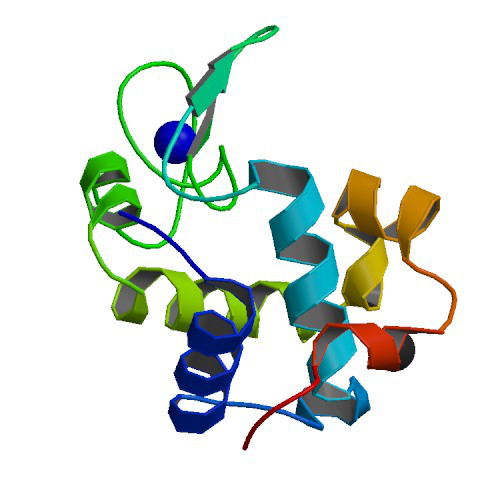

In [4]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://cdn.rcsb.org/images/rutgers/wu/3wul/3wul.pdb1-500.jpg')
img = Image.open(BytesIO(response.content))
display(img)

## Diffractor setup

In [5]:
outfile = 'diffr_poly_1.txt'

parameters = GAPDPhotonDiffractorParameters(
            detector_geometry=detector_geometry,
            beam_parameters=beam,
            number_of_spectrum_bins = 100)

diffractor = GAPDPhotonDiffractor(parameters=parameters,
                                          input_path='single-cu.xyz',
                                          output_path=outfile)

Passing beam parameters as a tratracing_out file.


In [6]:
diffractor.backengine()

GAPDPhotonDiffractor backengine command: mpirun -np 72 --map-by node --bind-to none -x OMPI_MCA_mpi_warn_on_fork=0 -x OMPI_MCA_btl_base_warn_component_unused=0 GAPD-SimEx -a -p in.param


127

## Poly Spectrum

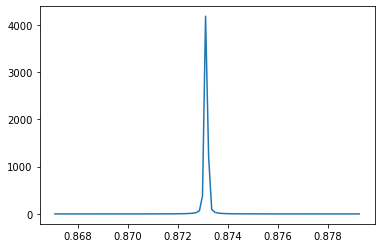

In [7]:
spec = np.loadtxt('spectrum.txt')
plt.plot(spec[:,0],spec[:,1])

## Diffraction pattern

(201, 201)


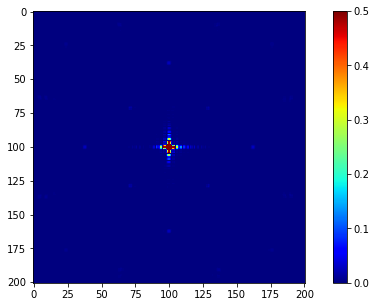

In [10]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet)
plt.colorbar()
plt.show()

(201, 201)


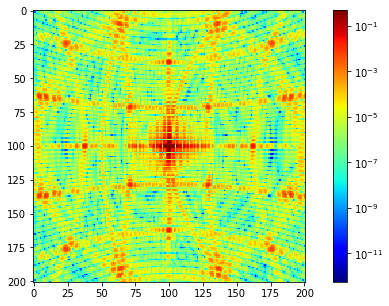

In [11]:
data = np.loadtxt(outfile,ndmin=2)
print (data.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(data,
           vmax = 0.5,
           cmap=cm.jet,
           norm=colors.LogNorm(vmin=data.min(), vmax=data.max())
          )
plt.colorbar()
plt.show()